In [1]:
import numpy as np
import pandas as pd 
df = pd.read_csv("HumidityDataset.csv")

C:\Users\sherwin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.head()

,station_id,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,MeanWaveDirection,Hmax,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity,QC_Flag
0,NaN,degrees_east,degrees_north,UTC,millibars,degrees true,knots,knots,meters,seconds,degrees_true,meters,degrees_C,degrees_C,degrees_C,percent,NaN
1,M1,-11.2,53.1266,2001-02-06T13:00:00Z,967.6,270.0,21.98,33.1,NaN,NaN,NaN,NaN,8.9,NaN,9.0,NaN,1.0
2,M1,-11.2,53.1266,2001-02-06T14:00:00Z,969.8,270.0,23.93,35.0,NaN,NaN,NaN,NaN,8.5,NaN,9.0,NaN,1.0
3,M1,-11.2,53.1266,2001-02-06T15:00:00Z,972.0,270.0,19.07,31.1,NaN,NaN,NaN,NaN,8.9,NaN,9.0,NaN,1.0
4,M1,-11.2,53.1266,2001-02-06T16:00:00Z,973.6,270.0,15.95,25.3,NaN,NaN,NaN,NaN,9.1,NaN,9.0,NaN,1.0


In [3]:
df.drop(["longitude","latitude", "WaveHeight", "WavePeriod", "MeanWaveDirection", "Hmax","QC_Flag"],inplace = True, axis = 1)

In [4]:
df.head()

,station_id,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
0,NaN,UTC,millibars,degrees true,knots,knots,degrees_C,degrees_C,degrees_C,percent
1,M1,2001-02-06T13:00:00Z,967.6,270.0,21.98,33.1,8.9,NaN,9.0,NaN
2,M1,2001-02-06T14:00:00Z,969.8,270.0,23.93,35.0,8.5,NaN,9.0,NaN
3,M1,2001-02-06T15:00:00Z,972.0,270.0,19.07,31.1,8.9,NaN,9.0,NaN
4,M1,2001-02-06T16:00:00Z,973.6,270.0,15.95,25.3,9.1,NaN,9.0,NaN


In [5]:
# Removed Values starting before 2010 
df = df.iloc[331371:]

In [6]:
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
#buoys = ['M2', 'M3', 'M4', 'M5','M6']

In [7]:
# Checking number of unique values in station_id ===> 6 different station ids, Will only M1 to M5
df.station_id.nunique()

6

In [8]:
# Selecting only the values of rows that have buoys ident as M2 to M6
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]

In [9]:
df = df.drop(["time"], axis = 1)

In [10]:
df.station_id.unique()

array(['M2', 'M6', 'M5', 'M4', 'M3'], dtype=object)

In [11]:
df = df.replace({ 'station_id': buoy_ident})

In [12]:
df.head()

,station_id,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
331371,1,1007.2,50,17,25,5.5,-1.1,10.3,62
331372,5,1015.8,20,18,33,7,0.9,11.4,65
331373,4,1006.2,NaN,NaN,NaN,5.3,1.7,10.6,78
331374,3,1011.2,10,12,20,4.7,1.1,10.2,78
331375,2,1009.4,30,17,25,5.7,-1.2,10.4,61


In [13]:
df = df.dropna(axis = 1, how='all')


In [14]:
df.reset_index(inplace = True)

In [15]:
df.dropna(inplace = True, how = 'all')

In [16]:
df.head()

,index,station_id,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
0,331371,1,1007.2,50,17,25,5.5,-1.1,10.3,62
1,331372,5,1015.8,20,18,33,7,0.9,11.4,65
2,331373,4,1006.2,NaN,NaN,NaN,5.3,1.7,10.6,78
3,331374,3,1011.2,10,12,20,4.7,1.1,10.2,78
4,331375,2,1009.4,30,17,25,5.7,-1.2,10.4,61


In [17]:
df = df.dropna()
df.drop('index', 1)
df.reset_index(inplace= True)

In [18]:
df.isna()
df.head()

,level_0,index,station_id,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
0,0,331371,1,1007.2,50,17,25,5.5,-1.1,10.3,62
1,1,331372,5,1015.8,20,18,33,7,0.9,11.4,65
2,3,331374,3,1011.2,10,12,20,4.7,1.1,10.2,78
3,4,331375,2,1009.4,30,17,25,5.7,-1.2,10.4,61
4,5,331376,2,1009,20,18,25,5.3,-0.3,10.4,67


In [19]:
df.corr(method='pearson')

from sklearn.preprocessing import StandardScaler
df_stand = StandardScaler().fit_transform(df.values)

from sklearn.decomposition import PCA
pca=PCA(0.95)
pca.fit(df_stand[:,:-1])
x=pca.transform(df_stand[:,:-1])

In [20]:
x[0:5, :]

array([[ 4.18631191,  0.79461991,  0.30714909,  1.23090625,  0.3804643 ,
        -1.48981971],
       [ 2.41616976,  1.3095576 , -0.18540937,  1.76304523, -0.49185769,
         1.33085769],
       [ 3.70654153,  0.38335277, -0.81209144,  1.65478673,  0.49826403,
        -0.03206536],
       [ 3.89874539,  0.88141475, -0.00966469,  1.45982913,  0.23746472,
        -0.790238  ],
       [ 3.86944491,  0.93279791,  0.07351626,  1.61075868,  0.20973082,
        -0.77964909]])

In [21]:
y = df_stand[:,-1]

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


RuntimeError: Physical devices cannot be modified after being initialized

In [33]:
def model1():    
    model = keras.Sequential()
    model.add(Dense(10, activation = "relu",input_dim = 6, name = "layer1", kernel_initializer='normal'))
    model.add(Dense(500, activation = "relu", name = "layer2"))

    model.add(Dense(1000, activation = "sigmoid", name = "layer3"))
    model.add(Dense(500, activation = "relu", name = "layer4"))
    model.add(Dense(50, activation = "relu", name = "layer5"))

    model.add(Dense(1, activation = "relu", name = "layer6",kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
    model.compile(loss="mean_squared_error", optimizer='adam')
    return model

batch_size = 2048

estimator = KerasRegressor(build_fn=model1, epochs=30, batch_size=4096, verbose=1)
history=estimator.fit(np.asarray(x).astype('float32'),np.asarray(y).astype('float32'))



#history = model.fit(x_pca, df.iloc[:, -1], batch_size=batch_size, epochs=20, validation_split=0.1)
# estimator = KerasRegressor(build_fn=model, epochs=100, batch_size=batch_size, verbose=0)
# history = model.fit(np.asarray(x).astype('float32'),np.asarray(y).astype('float32') , epochs=150, batch_size=50,  verbose=1, validation_split=0.3)
# kfold = KFold(n_splits=5)
# results = cross_val_score(estimator,np.asarray(x).astype('float32'), np.asarray(y).astype('float32'), cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0002
Epoch 2/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0002
Epoch 3/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0001
Epoch 4/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0001
Epoch 5/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0001
Epoch 6/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0001
Epoch 7/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0001
Epoch 8/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0001
Epoch 9/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0000
Epoch 10/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0000
Epoch 11/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0000
Epoch 12/30
21/21 [==============================] - 0s 15ms/step - loss: 1.0000
Epoch 13/30
21/21 [==================

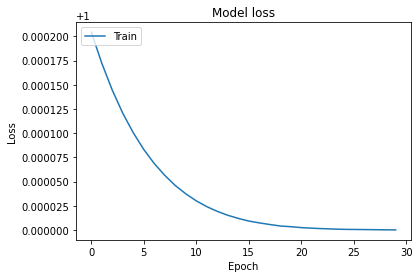

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: 'val_loss'

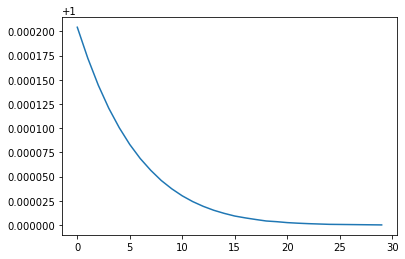

In [35]:
# preds = model.predict(x)

# print(mean_squared_error(y, preds))
#print(confusion_matrix(y_train1,y_pred))

# preds = model.predict(x_test)
# y_pred = np.argmax(preds, axis=1)
# y_test1 = np.argmax(y_test, axis=1)
# print(classification_report(y_test1, y_pred))
# print(confusion_matrix(y_test1,y_pred))


In [ ]:
x